In [21]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import json
# To Read Json Files
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops

#-----------------------------------------------------------------------

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# To make feature extraction from spotify app

#-----------------------------------------------------------------------

import statsmodels
import sklearn
# To perform Statistical Analysis 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # Import the PCA class function from sklearn

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook
# to handle skewed columns
import pandas as pd
import numpy as np
from skew_autotransform import skew_autotransform

In [3]:
DATASETS_PATH = 'C:/Users/Amir/technolab' # change to the path of your csv file
df = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))

In [5]:
df.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21


In [15]:
numerical_features = (df_modified.dtypes == 'int64') | (df_modified.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(df_modified.columns[i])
numerical_columns

['pid',
 'modified_at',
 'num_artists',
 'num_albums',
 'num_tracks',
 'num_followers',
 'num_edits',
 'playlist_duration_ms',
 'collaborative',
 'pos',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'playlist_followers_artist',
 'playlist_followers_album',
 'playlist_followers_track']

#handle skewed columns 


In [47]:
print(df[numerical_columns].where(df[numerical_columns] < 0))

        pid  modified_at  num_artists  num_albums  num_tracks  num_followers  \
0       NaN          NaN          NaN         NaN         NaN            NaN   
1       NaN          NaN          NaN         NaN         NaN            NaN   
2       NaN          NaN          NaN         NaN         NaN            NaN   
3       NaN          NaN          NaN         NaN         NaN            NaN   
4       NaN          NaN          NaN         NaN         NaN            NaN   
...     ...          ...          ...         ...         ...            ...   
266358  NaN          NaN          NaN         NaN         NaN            NaN   
266359  NaN          NaN          NaN         NaN         NaN            NaN   
266360  NaN          NaN          NaN         NaN         NaN            NaN   
266361  NaN          NaN          NaN         NaN         NaN            NaN   
266362  NaN          NaN          NaN         NaN         NaN            NaN   

        num_edits  playlist_duration_ms


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'pid' . Skewness = 0.02


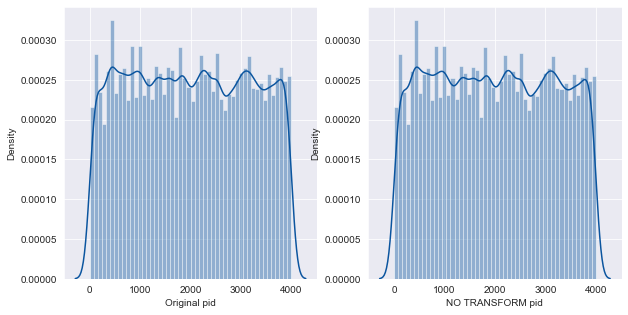

C:\Users\Amir\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Amir\anaconda3\lib\site-packages\numpy\core\_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)



 ------------------------------------------------------

 'modified_at' had 'negative' skewness of -1.57

 Transformation yielded skewness of nan


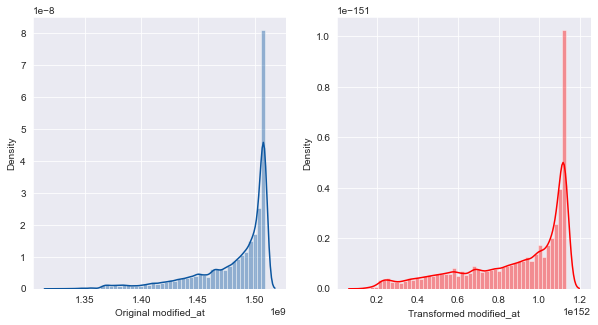


 ------------------------------------------------------

 'num_artists' had 'positive' skewness of 0.92

 Transformation yielded skewness of -0.04


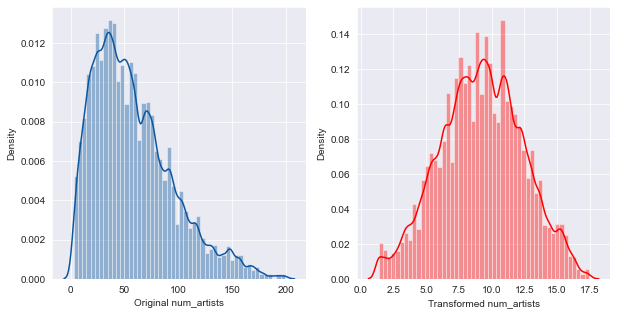


 ------------------------------------------------------

 'num_albums' had 'positive' skewness of 0.65

 Transformation yielded skewness of -0.07


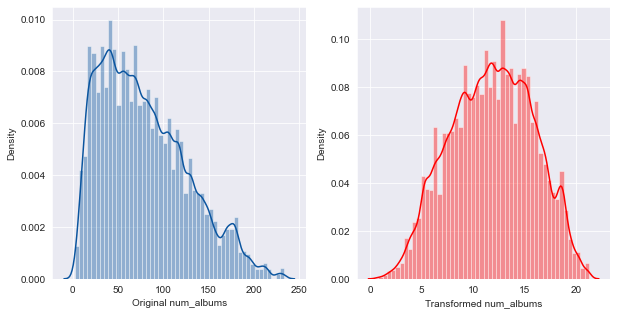


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'num_tracks' . Skewness = 0.41


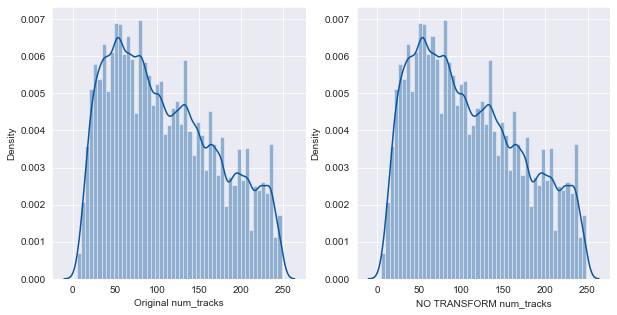


 ------------------------------------------------------

 'num_followers' had 'positive' skewness of 57.36

 Transformation yielded skewness of 0.87


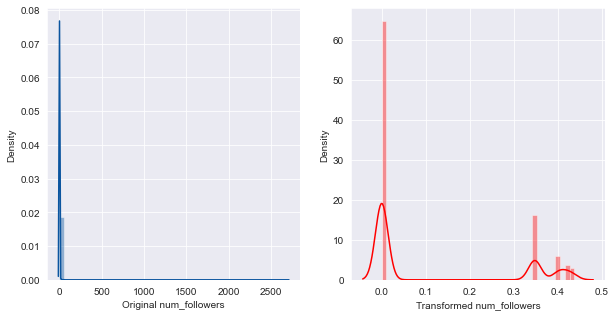


 ------------------------------------------------------

 'num_edits' had 'positive' skewness of 1.73

 Transformation yielded skewness of -0.03


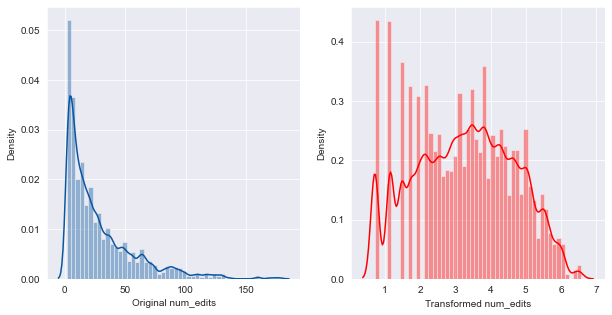


 ------------------------------------------------------

 'playlist_duration_ms' had 'positive' skewness of 0.52

 Transformation yielded skewness of -0.09


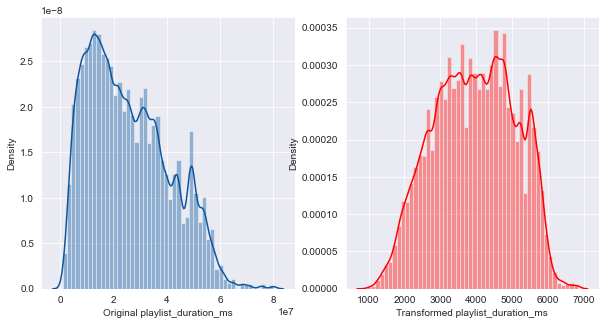


 ------------------------------------------------------

 'collaborative' had 'positive' skewness of 6.60

 Transformation yielded skewness of 6.60


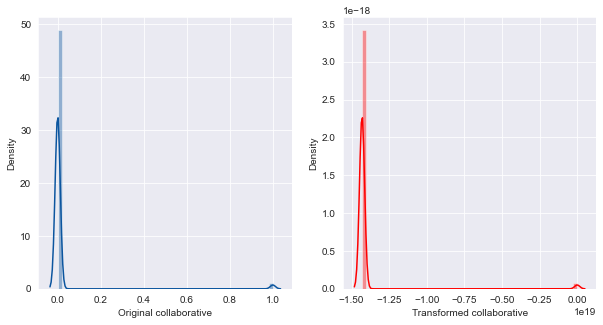


 ------------------------------------------------------

 'pos' had 'positive' skewness of 1.20

 Transformation yielded skewness of -0.09


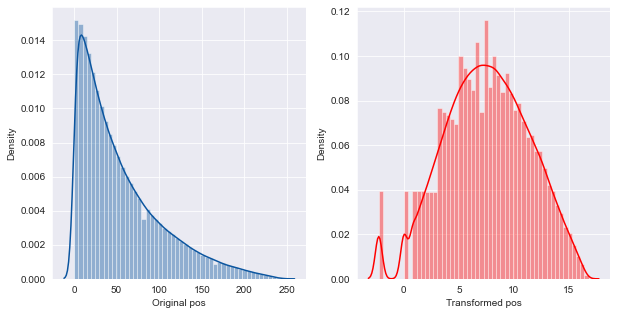


 ------------------------------------------------------

 'duration_ms' had 'positive' skewness of 13.06

 Transformation yielded skewness of 0.40


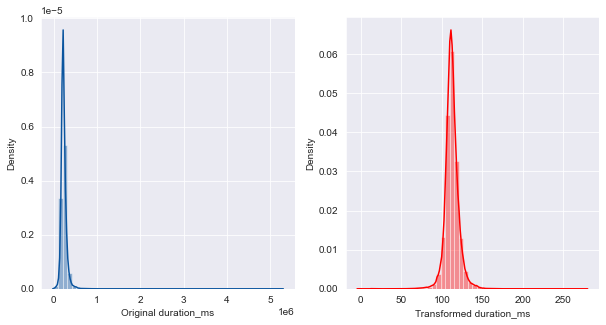


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'danceability' . Skewness = -0.31


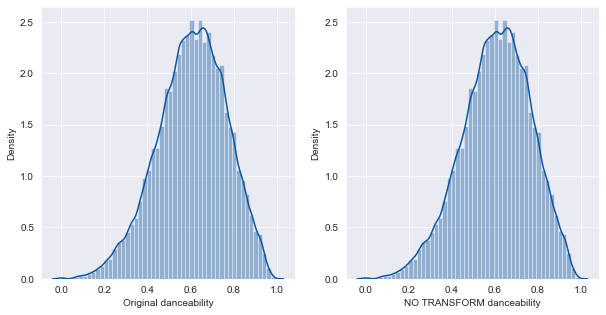


 ------------------------------------------------------

 'energy' had 'negative' skewness of -0.61

 Transformation yielded skewness of -0.23


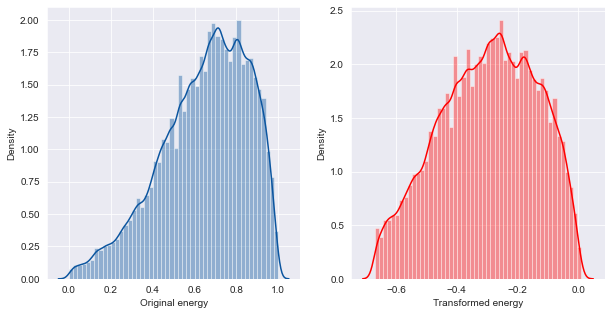


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'key' . Skewness = 0.03


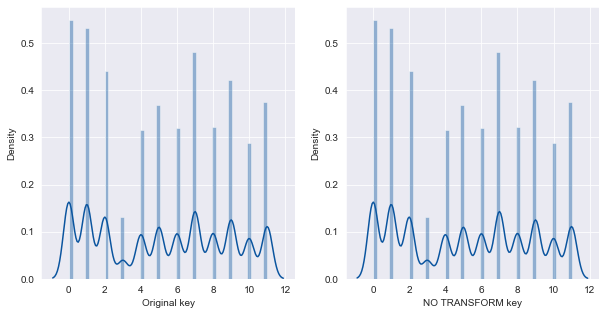


 ------------------------------------------------------

 'loudness' had 'negative' skewness of -2.10

 Transformation yielded skewness of -0.12


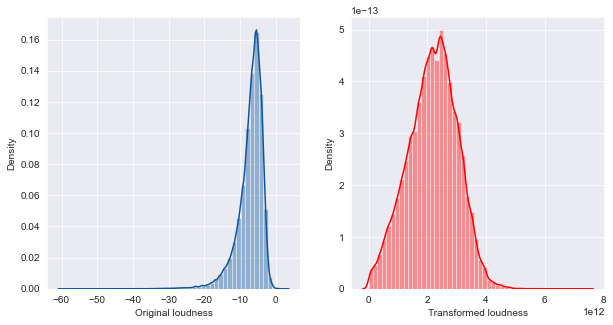


 ------------------------------------------------------

 'mode' had 'negative' skewness of -0.69

 Transformation yielded skewness of -0.69


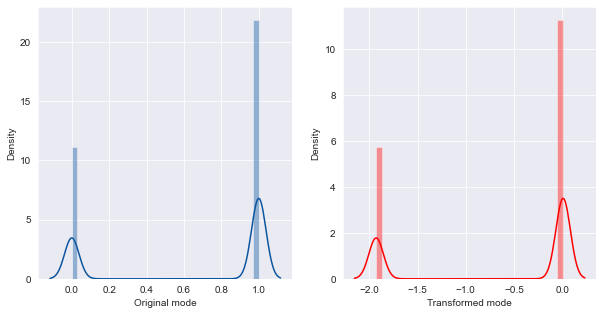


 ------------------------------------------------------

 'speechiness' had 'positive' skewness of 2.55

 Transformation yielded skewness of 0.15


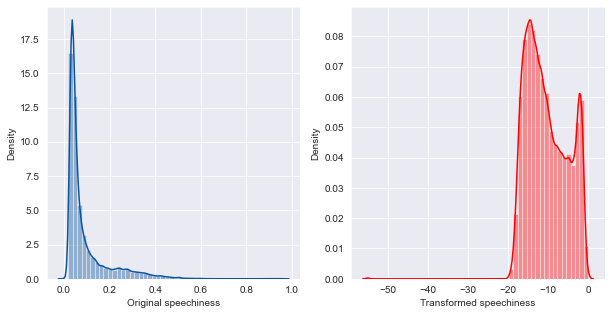


 ------------------------------------------------------

 'acousticness' had 'positive' skewness of 1.27

 Transformation yielded skewness of -0.03


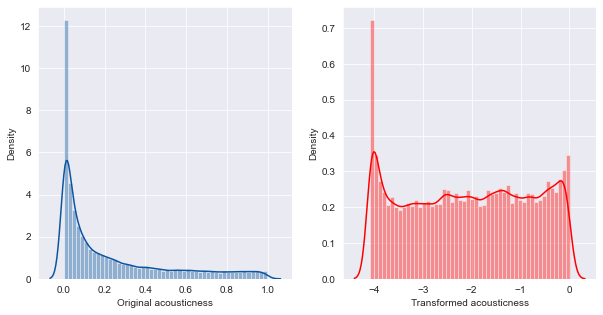


 ------------------------------------------------------

 'instrumentalness' had 'positive' skewness of 3.72

 Transformation yielded skewness of 1.61


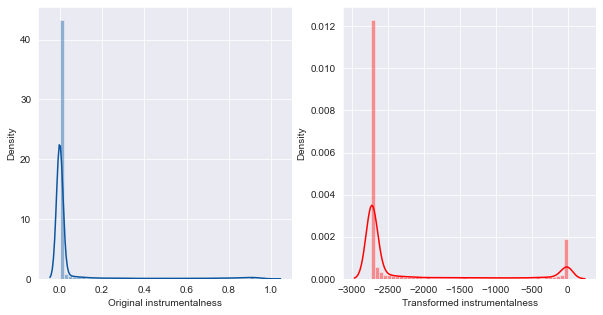


 ------------------------------------------------------

 'liveness' had 'positive' skewness of 2.21

 Transformation yielded skewness of 0.01


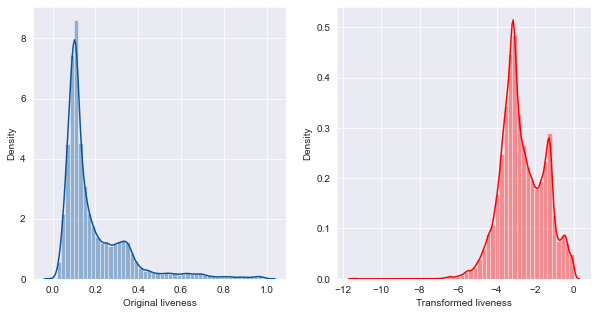


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'valence' . Skewness = 0.10


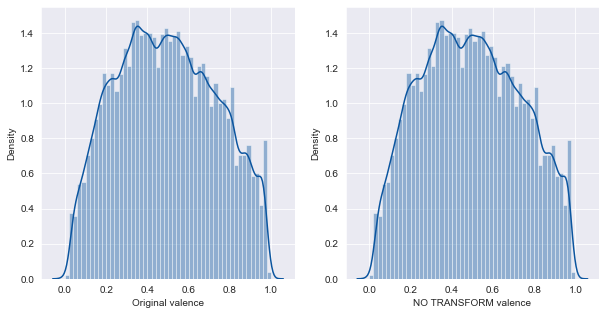


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'tempo' . Skewness = 0.35


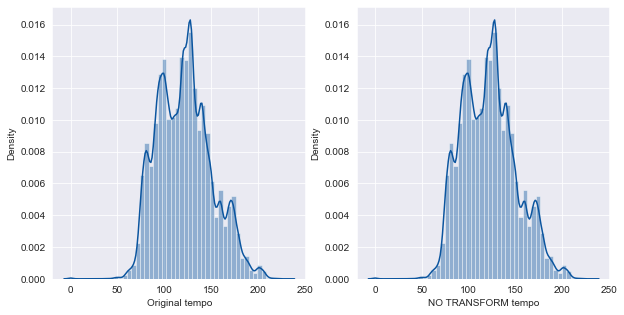


 ------------------------------------------------------

 'time_signature' had 'negative' skewness of -4.65

 Transformation yielded skewness of 1.12


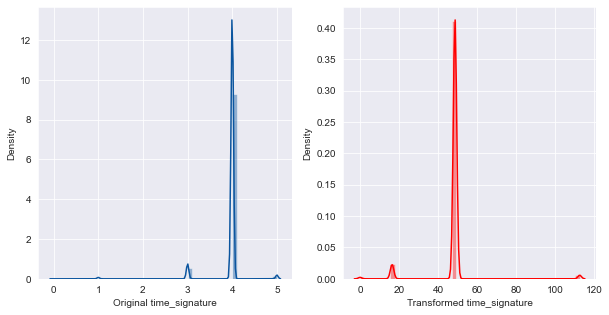


 ------------------------------------------------------

 'playlist_followers_artist' had 'positive' skewness of 4.45

 Transformation yielded skewness of -0.05


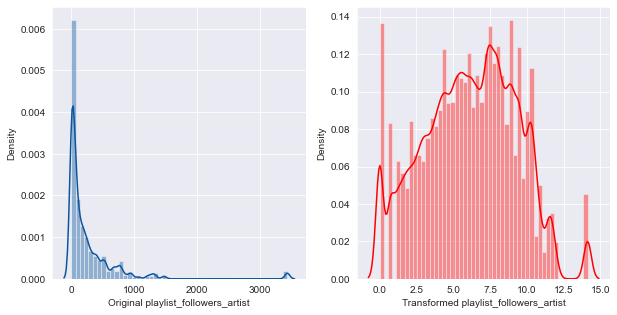


 ------------------------------------------------------

 'playlist_followers_album' had 'positive' skewness of 2.87

 Transformation yielded skewness of -0.04


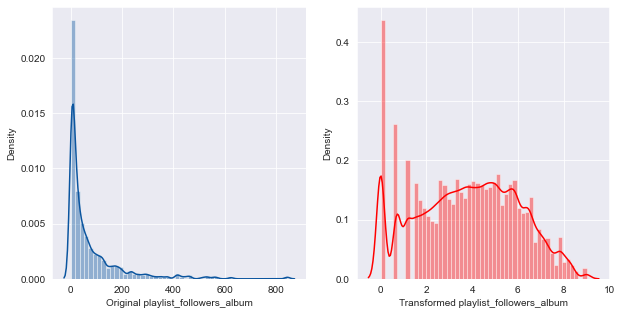


 ------------------------------------------------------

 'playlist_followers_track' had 'positive' skewness of 2.49

 Transformation yielded skewness of -0.02


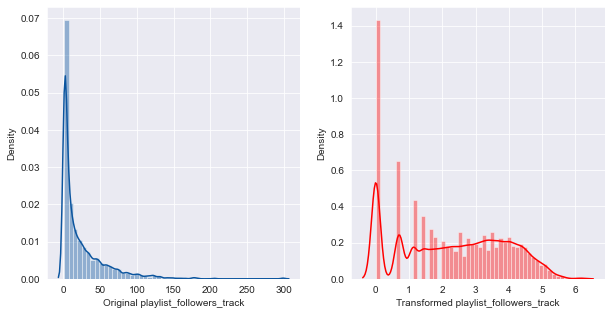

Original average skewness value was 4.33
Average skewness after transformation is 0.54


C:\Users\Amir\anaconda3\lib\site-packages\pandas\core\nanops.py:1206: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\Amir\anaconda3\lib\site-packages\pandas\core\nanops.py:1218: RuntimeWarning: overflow encountered in double_scalars
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


In [29]:

transformedDF = skew_autotransform(df.copy(deep=True), plot = True,include=numerical_columns , exp = False, threshold = 0.5)

print('Original average skewness value was %2.2f' %(np.mean(abs(df.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(transformedDF.skew()))))

#tukey's box

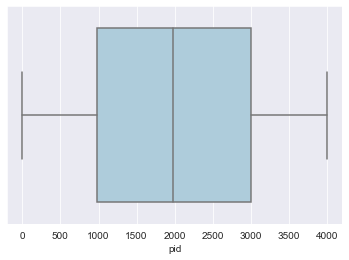

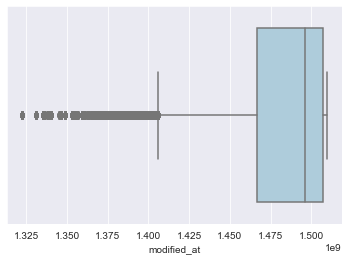

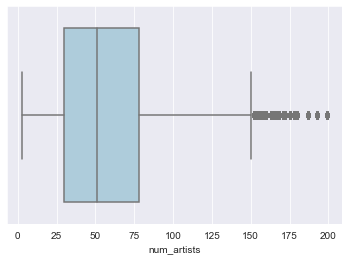

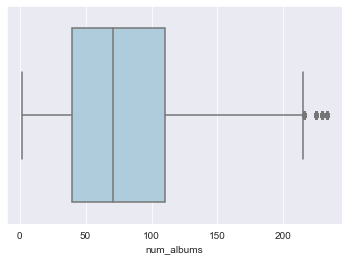

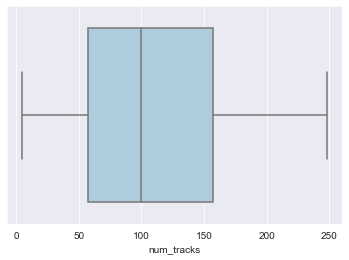

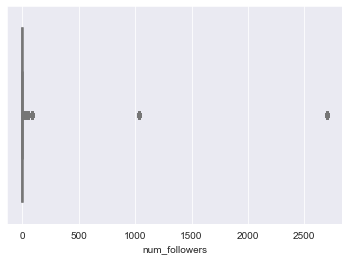

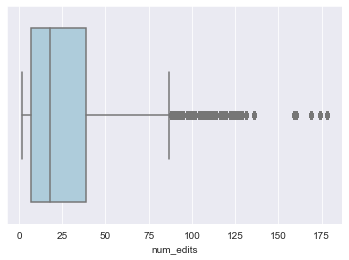

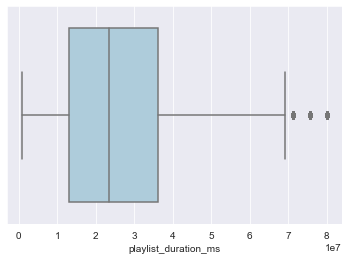

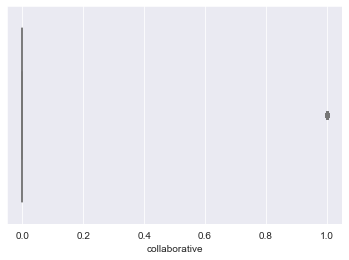

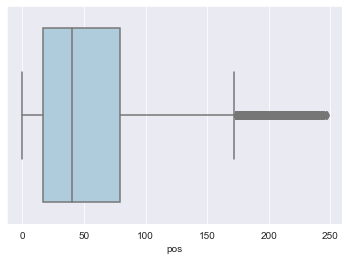

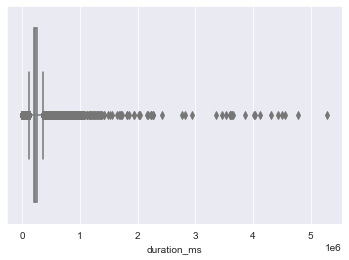

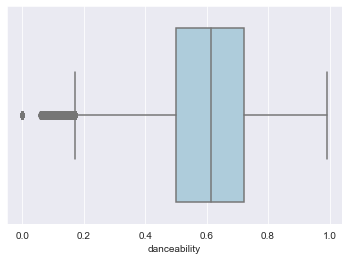

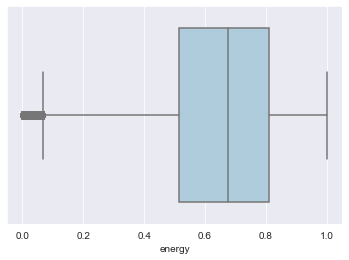

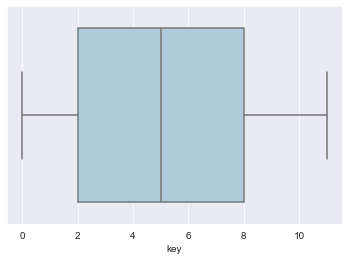

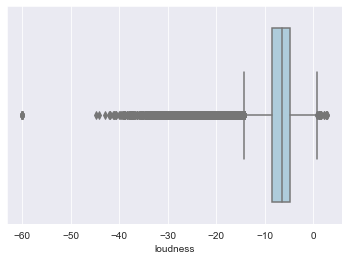

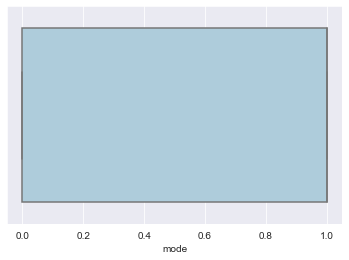

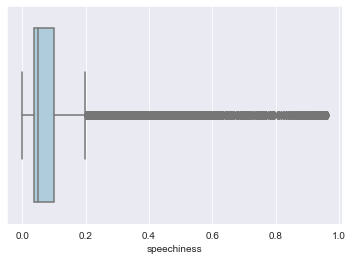

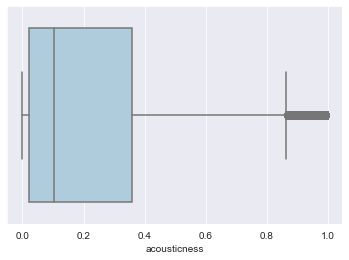

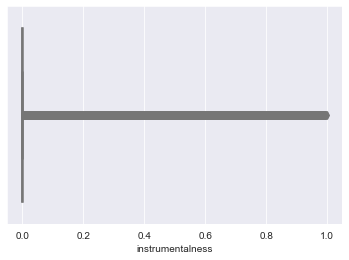

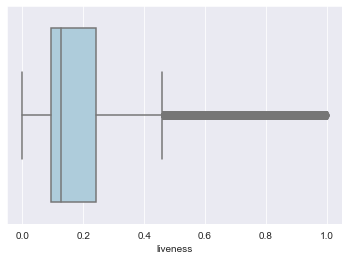

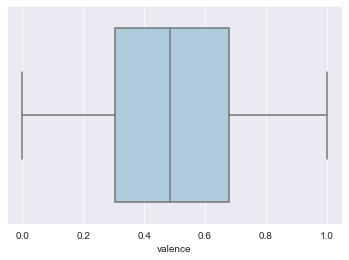

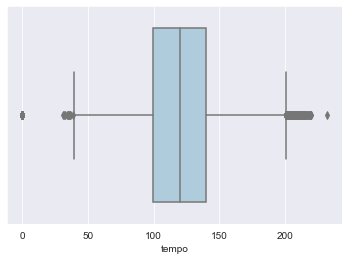

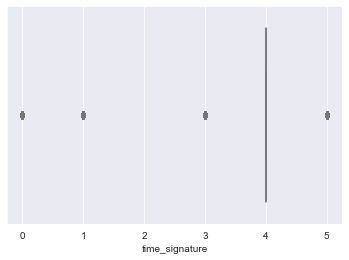

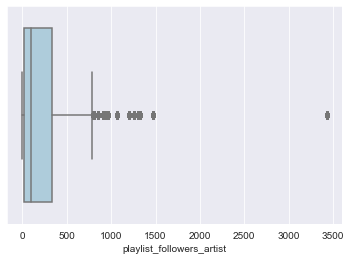

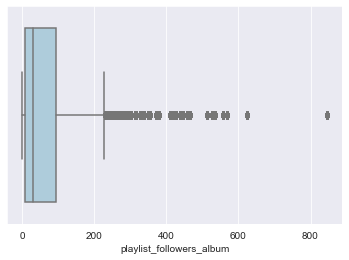

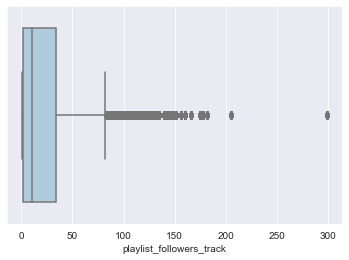

In [38]:
for col in numerical_columns:
    sns.boxplot(df[col])
    plt.show()

In [39]:
def remove_outliers(df, numericalColumns):
    df1 = df.copy()
    for col in numericalColumns:
        Q1=df1[col].quantile(0.25)
        Q3=df1[col].quantile(0.75)
        IQR=Q3-Q1
        lower=Q1-1.5*IQR
        upper=Q3+1.5*IQR
        df1[col][(df1[col]<lower)]=lower
        df1[col][(df1[col]>upper)]=upper
    return df1

In [41]:
df_cleaned = remove_outliers(df, numerical_columns)
df_cleaned

C:\Users\Amir\AppData\Local\Temp\ipykernel_7076\1796915527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]<lower)]=lower
C:\Users\Amir\AppData\Local\Temp\ipykernel_7076\1796915527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col][(df1[col]>upper)]=upper


,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1.0,6,1.15e+07,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863.0,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,1.83e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126.0,22,21
1,123,w o r k o u t,NaN,1500681600,150,215,245,1.0,26,5.57e+07,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863.0,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,1.83e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126.0,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1.0,4,2.13e+07,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863.0,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,1.83e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126.0,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1.0,15,4.33e+07,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863.0,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,1.83e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126.0,22,21
4,382,spin,NaN,1505347200,13,14,14,2.0,5,3.62e+06,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863.0,The Cookbook,0.90,0.81,4,-7.11,0,0.12,3.11e-02,1.83e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126.0,22,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1.0,9,2.25e+07,0,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080.0,Love Is A Four Letter Word,0.65,0.63,7,-7.16,1,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248.0,79,1
266359,3999,other,NaN,1420848000,17,56,97,1.0,9,2.25e+07,0,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106.0,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,1,0.03,4.48e-03,1.83e-03,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,https://api.spotify.com/v1/tracks/6DW7MN6DCVvT...,https://api.spotify.com/v1/audio-analysis/6DW7...,4,79.0,1,1
266360,3999,other,NaN,142

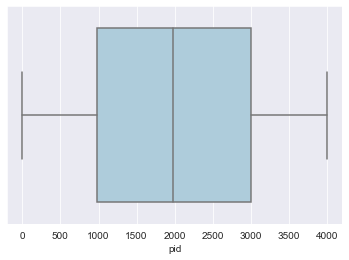

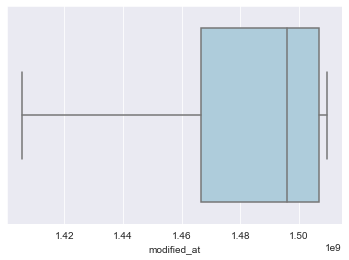

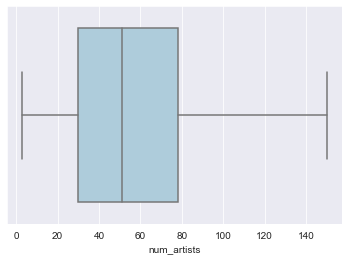

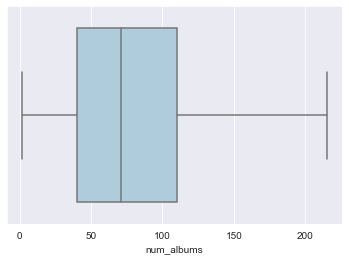

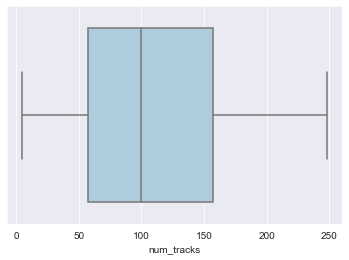

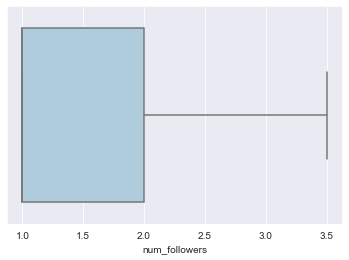

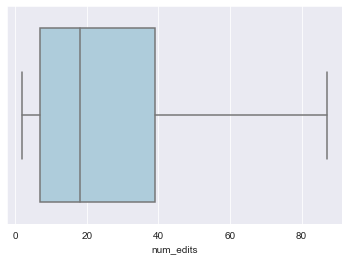

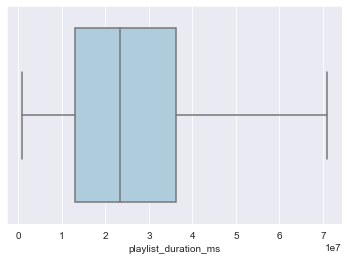

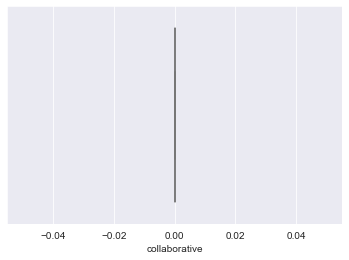

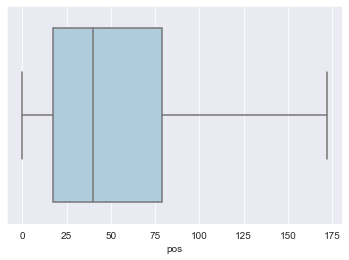

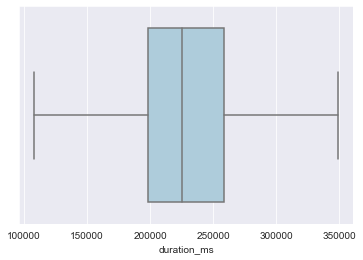

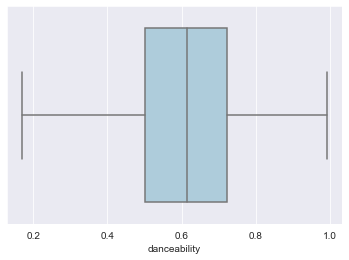

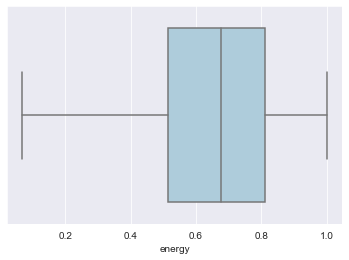

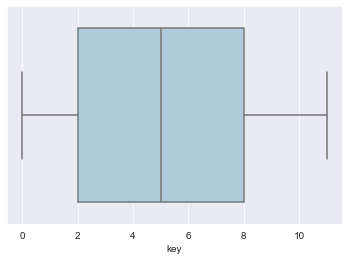

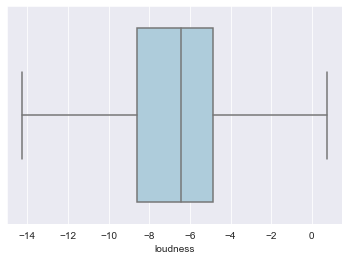

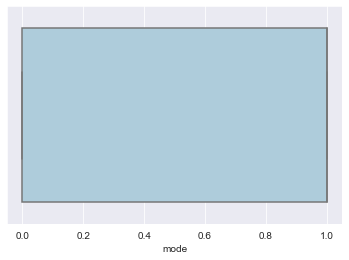

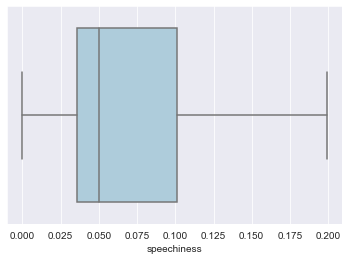

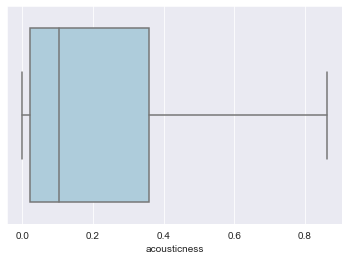

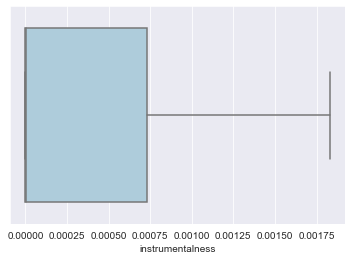

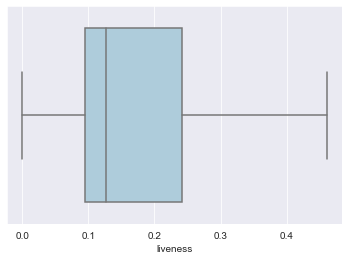

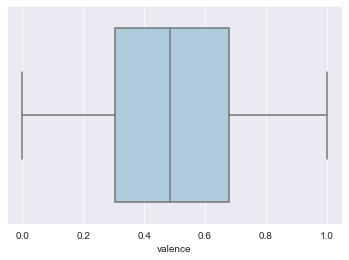

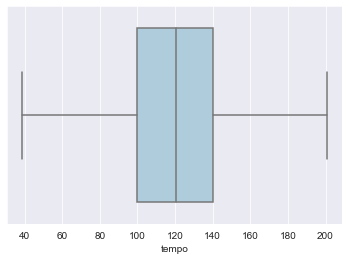

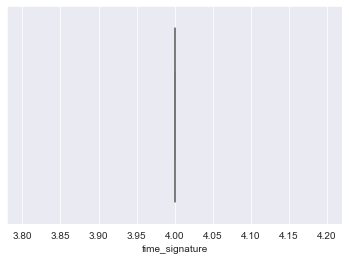

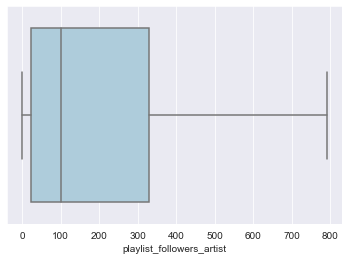

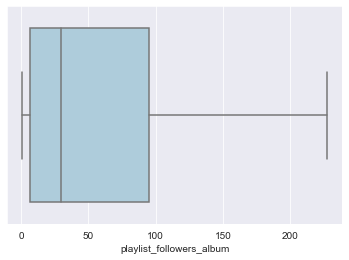

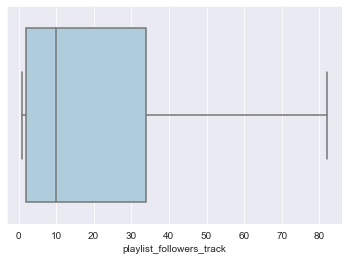

In [42]:
for col in numerical_columns:
    sns.boxplot(df_cleaned[col])
    plt.show()

# scalling

In [43]:
scaler = MinMaxScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numerical_columns]), columns = df_cleaned[numerical_columns].columns)
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0.00,0.85,0.23,0.21,0.19,0.0,0.05,0.15,0.0,0.00e+00,0.49,0.89,0.80,0.36,0.48,0.0,0.61,3.61e-02,1.0,0.10,0.81,0.54,0.0,0.16,0.09,0.25
1,0.03,0.92,1.00,1.00,0.99,0.0,0.28,0.78,0.0,4.24e-01,0.49,0.89,0.80,0.36,0.48,0.0,0.61,3.61e-02,1.0,0.10,0.81,0.54,0.0,0.16,0.09,0.25
2,0.05,0.95,0.48,0.43,0.38,0.0,0.02,0.29,0.0,8.14e-02,0.49,0.89,0.80,0.36,0.48,0.0,0.61,3.61e-02,1.0,0.10,0.81,0.54,0.0,0.16,0.09,0.25
3,0.09,0.66,0.73,0.59,0.67,0.0,0.15,0.61,0.0,2.44e-01,0.49,0.89,0.80,0.36,0.48,0.0,0.61,3.61e-02,1.0,0.10,0.81,0.54,0.0,0.16,0.09,0.25
4,0.10,0.96,0.07,0.06,0.04,0.4,0.04,0.04,0.0,5.81e-03,0.49,0.89,0.80,0.36,0.48,0.0,0.61,3.61e-02,1.0,0.10,0.81,0.54,0.0,0.16,0.09,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00,0.15,0.10,0.25,0.38,0.0,0.08,0.31,0.0,1.63e-01,0.53,0.58,0.60,0.64,0.47,1.0,0.12,5.61e-02,0.0,0.26,0.70,0.28,0.0,0.31,0.35,0.00
266359,1.00,0.15,0.10,0.25,0.38,0.0,0.08,0.31,0.0,2.09e-01,0.75,0.35,0.73,0.82,0.54,1.0,0.16,5.20e-03,1.0,0.27,0.63,0.83,0.0,0.10,0.00,0.00
266360,1.00,0.15,0.10,0.25,0.38,0.0,0.08,0.31,0.0,2.15e-01,0.64,0.66,0.66,1.00,0.37,1.0,0.27,6.08e-02,1.0,0.14,0.78,0.33,0.0,0.10,0.00,0.00
266361,1.00,0.15,0.10,0.25,0.38,0.0,0.08,0.31,0.0,2.27e-01,0.58,0.68,0.67,0.82,0.46,1.0,0.18,1.75e-01,1.0,0.17,0.60,0.34,0.0,0.10,1.00,0.14


In [44]:
df_scaled+= 0.0000000000001

In [45]:
df_scaled

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,1.00e-13,0.85,0.23,0.21,0.19,1.00e-13,0.05,0.15,1.00e-13,1.00e-13,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.61,3.61e-02,1.00e+00,0.10,0.81,0.54,1.00e-13,0.16,9.29e-02,2.47e-01
1,3.08e-02,0.92,1.00,1.00,0.99,1.00e-13,0.28,0.78,1.00e-13,4.24e-01,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.61,3.61e-02,1.00e+00,0.10,0.81,0.54,1.00e-13,0.16,9.29e-02,2.47e-01
2,5.45e-02,0.95,0.48,0.43,0.38,1.00e-13,0.02,0.29,1.00e-13,8.14e-02,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.61,3.61e-02,1.00e+00,0.10,0.81,0.54,1.00e-13,0.16,9.29e-02,2.47e-01
3,8.55e-02,0.66,0.73,0.59,0.67,1.00e-13,0.15,0.61,1.00e-13,2.44e-01,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.61,3.61e-02,1.00e+00,0.10,0.81,0.54,1.00e-13,0.16,9.29e-02,2.47e-01
4,9.55e-02,0.96,0.07,0.06,0.04,4.00e-01,0.04,0.04,1.00e-13,5.81e-03,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.61,3.61e-02,1.00e+00,0.10,0.81,0.54,1.00e-13,0.16,9.29e-02,2.47e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,1.63e-01,0.53,0.58,0.60,0.64,0.47,1.00e+00,0.12,5.61e-02,1.00e-13,0.26,0.70,0.28,1.00e-13,0.31,3.45e-01,1.00e-13
266359,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.09e-01,0.75,0.35,0.73,0.82,0.54,1.00e+00,0.16,5.20e-03,1.00e+00,0.27,0.63,0.83,1.00e-13,0.10,1.00e-13,1.00e-13
266360,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.15e-01,0.64,0.66,0.66,1.00,0.37,1.00e+00,0.27,6.08e-02,1.00e+00,0.14,0.78,0.33,1.00e-13,0.10,1.00e-13,1.00e-13
266361,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.27e-01,0.58,0.68,0.67,0.82,0.46,1.00e+00,0.18,1.75e-01,1.00e+00,0.17,0.60,0.34,1.00e-13,0.10,1.00e+00,1.36e-01


## Create New Features by Features Interaction

In [49]:
df_new = df_scaled.copy()
happy = pd.Series(data = df_new['valence'], index = df_new['valence'].index, name='happy')
happy[happy>0.5] = 1
happy[happy<0.5] = 0
happy

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy, Length: 266363, dtype: float64

In [50]:
speech = pd.Series(data = df_new['speechiness'], index = df_new['speechiness'].index, name='speech')

speech[(speech>=0.66)] = 1
speech[(speech<0.66)] = 0
speech

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    0.0
Name: speech, Length: 266363, dtype: float64

In [51]:
df_new = pd.concat([df_new, happy, speech], axis=1)
df_new

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,happy,speech
0,1.00e-13,0.85,0.23,0.21,0.19,1.00e-13,0.05,0.15,1.00e-13,1.00e-13,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.54,1.00e-13,0.16,9.29e-02,2.47e-01,1.0,0.0
1,3.08e-02,0.92,1.00,1.00,0.99,1.00e-13,0.28,0.78,1.00e-13,4.24e-01,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.54,1.00e-13,0.16,9.29e-02,2.47e-01,1.0,0.0
2,5.45e-02,0.95,0.48,0.43,0.38,1.00e-13,0.02,0.29,1.00e-13,8.14e-02,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.54,1.00e-13,0.16,9.29e-02,2.47e-01,1.0,0.0
3,8.55e-02,0.66,0.73,0.59,0.67,1.00e-13,0.15,0.61,1.00e-13,2.44e-01,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.54,1.00e-13,0.16,9.29e-02,2.47e-01,1.0,0.0
4,9.55e-02,0.96,0.07,0.06,0.04,4.00e-01,0.04,0.04,1.00e-13,5.81e-03,0.49,0.89,0.80,0.36,0.48,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.54,1.00e-13,0.16,9.29e-02,2.47e-01,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,1.63e-01,0.53,0.58,0.60,0.64,0.47,1.00e+00,0.0,5.61e-02,1.00e-13,0.26,1.0,0.28,1.00e-13,0.31,3.45e-01,1.00e-13,1.0,0.0
266359,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.09e-01,0.75,0.35,0.73,0.82,0.54,1.00e+00,0.0,5.20e-03,1.00e+00,0.27,1.0,0.83,1.00e-13,0.10,1.00e-13,1.00e-13,1.0,0.0
266360,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.15e-01,0.64,0.66,0.66,1.00,0.37,1.00e+00,0.0,6.08e-02,1.00e+00,0.14,1.0,0.33,1.00e-13,0.10,1.00e-13,1.00e-13,1.0,0.0
266361,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.00e-13,2.27e-01,0.58,0.68,0.67,0.82,0.46,1.00e+00,0.0,1.75e-01,1.00e+00,0.17,1.0,0.34,1.00e-13,0.10,1.00e+00,1.36e-01,1.0,0.0


## dropping useless columns 

In [72]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.04)
selector.fit(df_new)

filtered_cols = df_new.columns[selector.get_support()] 
filtered_cols

Index(['pid', 'modified_at', 'num_artists', 'num_albums', 'num_tracks',
       'num_followers', 'num_edits', 'playlist_duration_ms', 'pos',
       'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'playlist_followers_artist',
       'playlist_followers_album', 'playlist_followers_track', 'happy',
       'speech'],
      dtype='object')

In [68]:
df_new_v = pd.DataFrame()
df_new_v = df_new[filtered_cols]                                  
df_new_v

,pid,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,duration_ms,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,playlist_followers_artist,playlist_followers_album,playlist_followers_track,happy,speech
0,1.00e-13,0.85,0.23,0.21,0.19,1.00e-13,0.05,0.15,1.00e-13,0.49,0.80,0.36,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.16,9.29e-02,2.47e-01,1.0,0.0
1,3.08e-02,0.92,1.00,1.00,0.99,1.00e-13,0.28,0.78,4.24e-01,0.49,0.80,0.36,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.16,9.29e-02,2.47e-01,1.0,0.0
2,5.45e-02,0.95,0.48,0.43,0.38,1.00e-13,0.02,0.29,8.14e-02,0.49,0.80,0.36,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.16,9.29e-02,2.47e-01,1.0,0.0
3,8.55e-02,0.66,0.73,0.59,0.67,1.00e-13,0.15,0.61,2.44e-01,0.49,0.80,0.36,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.16,9.29e-02,2.47e-01,1.0,0.0
4,9.55e-02,0.96,0.07,0.06,0.04,4.00e-01,0.04,0.04,5.81e-03,0.49,0.80,0.36,1.00e-13,0.0,3.61e-02,1.00e+00,0.10,1.0,0.16,9.29e-02,2.47e-01,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,1.63e-01,0.53,0.60,0.64,1.00e+00,0.0,5.61e-02,1.00e-13,0.26,1.0,0.31,3.45e-01,1.00e-13,1.0,0.0
266359,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,2.09e-01,0.75,0.73,0.82,1.00e+00,0.0,5.20e-03,1.00e+00,0.27,1.0,0.10,1.00e-13,1.00e-13,1.0,0.0
266360,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,2.15e-01,0.64,0.66,1.00,1.00e+00,0.0,6.08e-02,1.00e+00,0.14,1.0,0.10,1.00e-13,1.00e-13,1.0,0.0
266361,1.00e+00,0.15,0.10,0.25,0.38,1.00e-13,0.08,0.31,2.27e-01,0.58,0.67,0.82,1.00e+00,0.0,1.75e-01,1.00e+00,0.17,1.0,0.10,1.00e+00,1.36e-01,1.0,0.0


<AxesSubplot:>

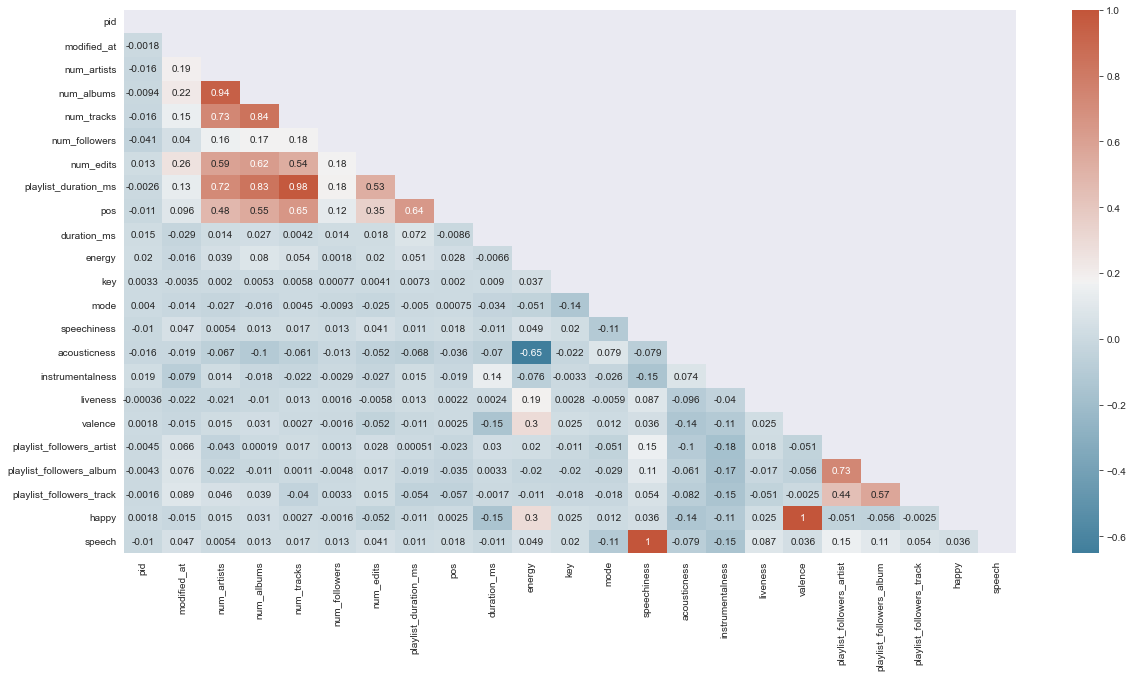

In [69]:
corr = df_new_v.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

The cumulative variance of the first two principal components is 0.45269


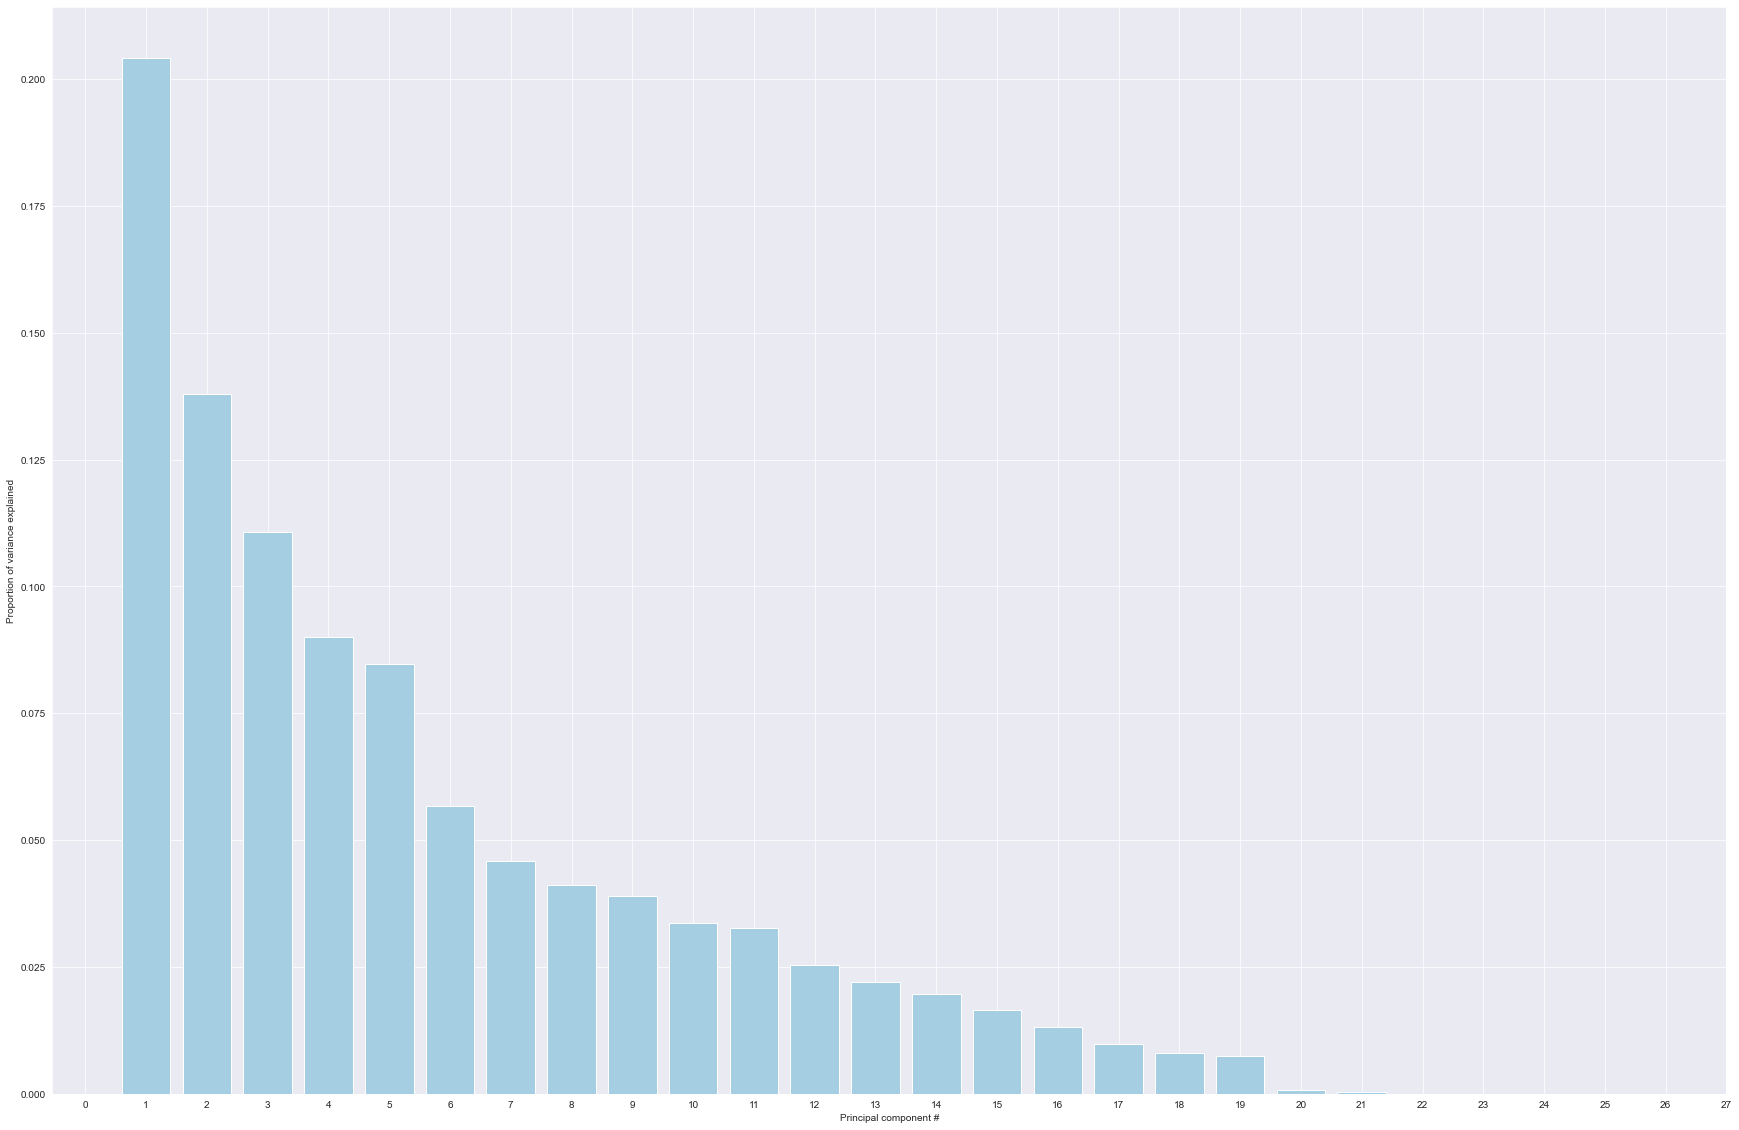

In [70]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_new_v)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_new.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))